# Flight Price Prediction


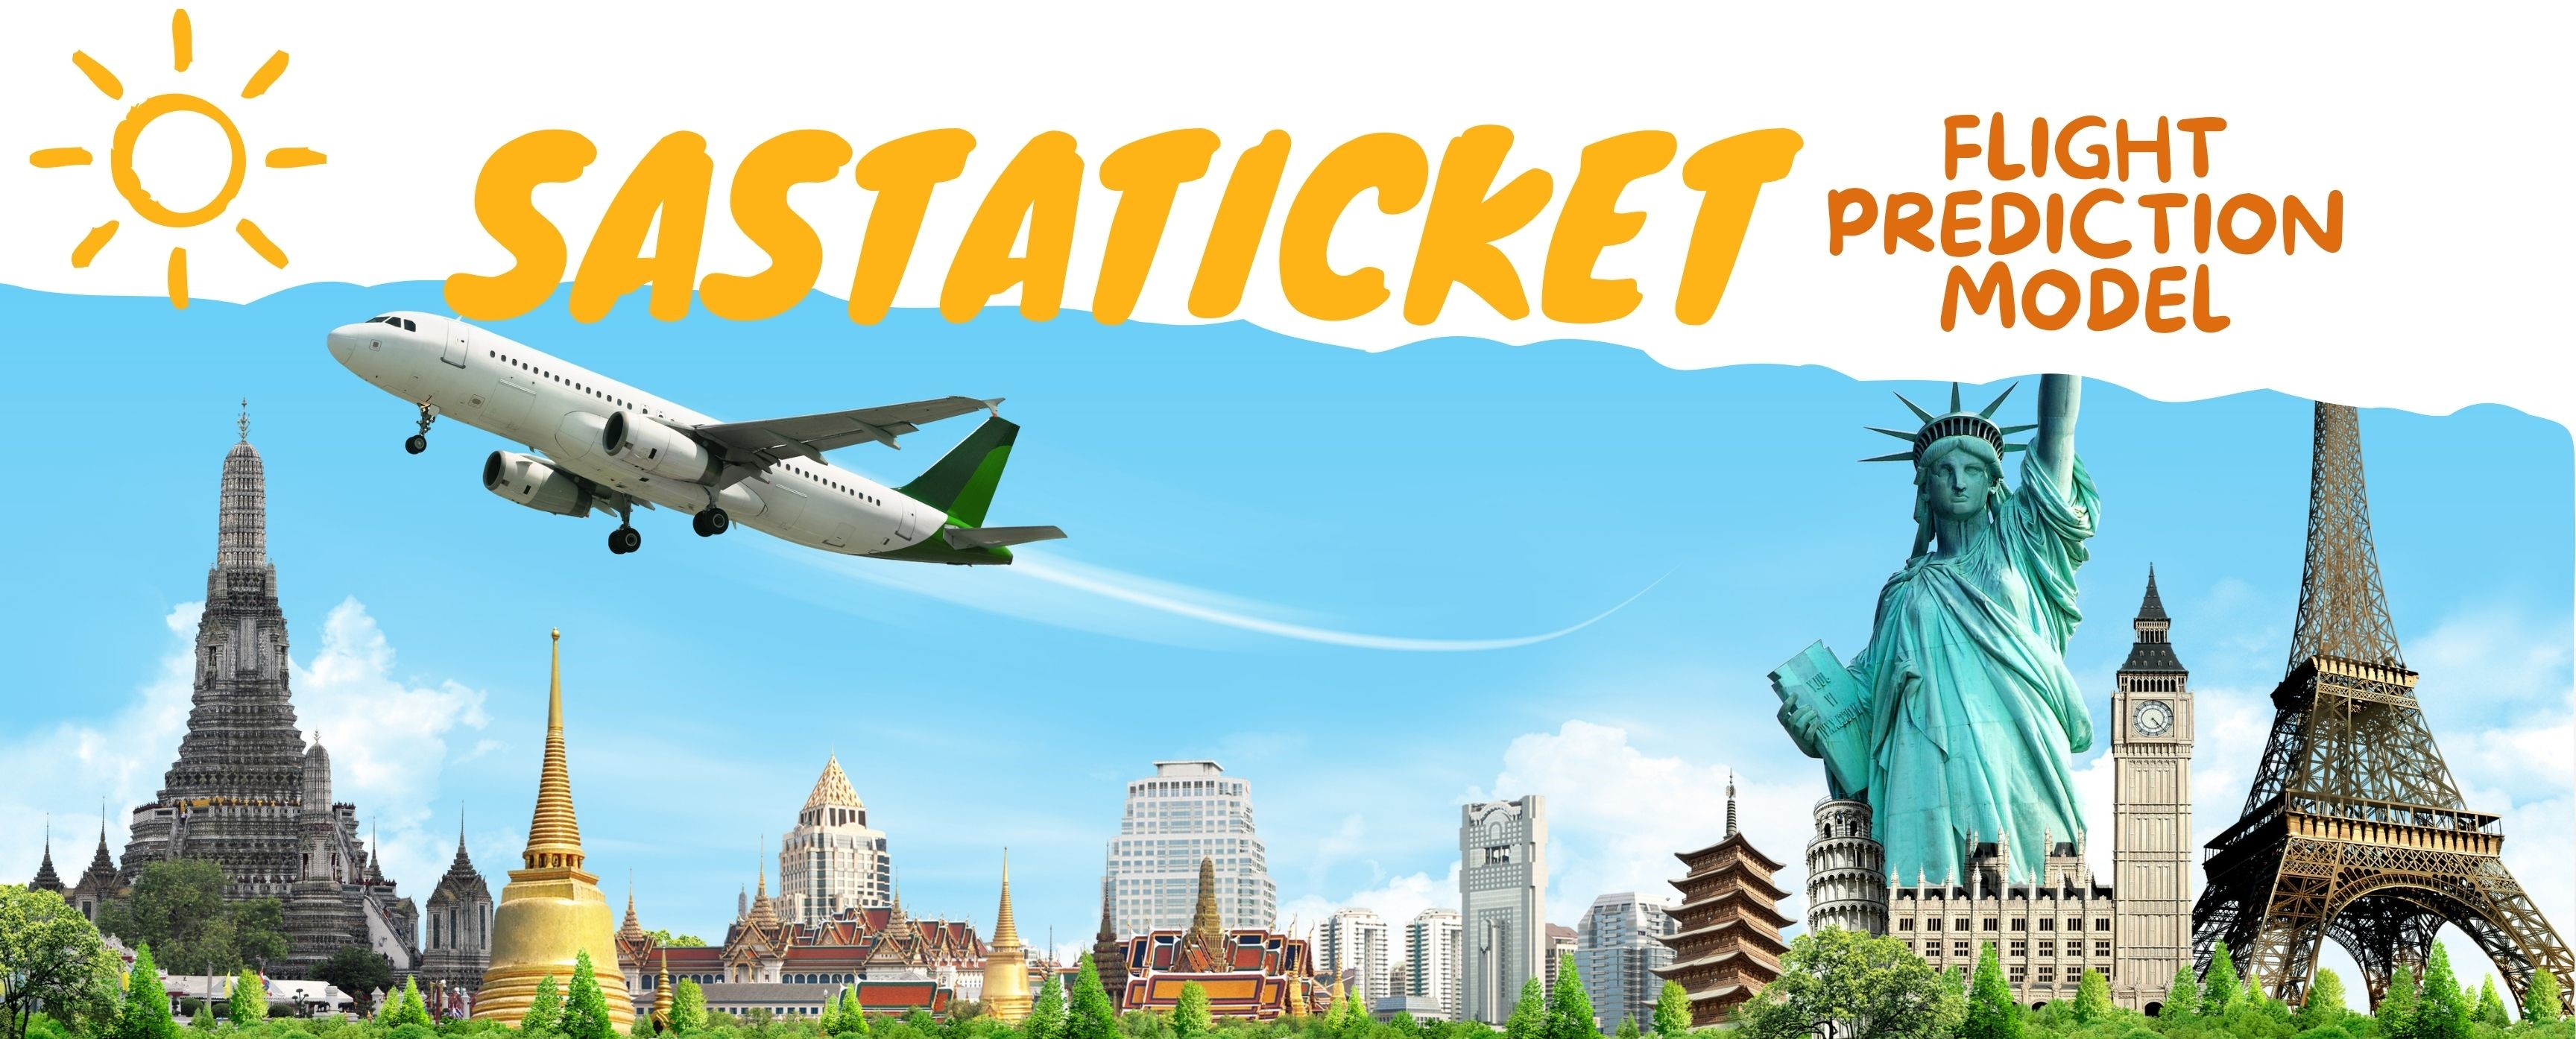

In [1]:
from IPython.display import Image
Image(filename='sastaticket.jpg')

### **Table of Contents**
1. **Instruction**
2. **Problem Statement**
3. **Preparing Data**
4. **Exploratory Data Analysis (EDA)**
    * Dimensions/Shape of the Dataset
    * Info of all the columns/features
    * Checking for missing values
    * Descriptive Statistics
    * Unique values in Categorical columns
    * Removing unwanted columns
    * Re-checking columns datatype
5. **Feature Engineering - I**
    * Typecasting (strings to datetime)
    * Verifying Typecasting
    * Creating new columns
    * Verifying for missing values after column creation
6. **Visualization**
    * Separating categorical and continuous columns for plotting
    * Count plot
    * Displot
    * Boxplot
    * Displot of Target (Price)
    * Boxplot of Target (Price)
7. **Feature Engineering - II**
    * Outlier Removal
    * Skewness/ Horizontal shift of the data
    * Kurtosis/ Vertical shift of the data
    * Dropping unwanted columns
8. **Feature Encoding**
    * Label Encoding
9. **Feature Scaling**
    * MinMax
10. **Feature Selection**
    * Feature Importance
    * Correlation among Important Features
11. **Model Selection**
    * Importing Models
    * Models Function
    * Metrics Function
    * Model Tuning Function
    * Models Visualization Function
    * Splitting data into Train and Test
    * Model Training and Evaluation
12. **Saving Results**

## **1. Instructions:**
1. You have a flight dataset
2. Find the cheapest and expensive flight at a specific time
3. You have to go through EDA
4. ML Model
5. Find a sweet spot for cheap ticket

## **2. Problem Statement**

* Ahmed is a customer of **Sastaticket.pk**. He is planning to fly from Karachi to Islamabad for his<br>
brother’s wedding and is currently in the process of choosing tickets.<br>
* Ahmed has to go to Islamabad but Ahmed also wants to save some money in the process, so he chooses to wait instead of buy now,<br>
simply because ticket prices are just too high.<br>
* Is this the right decision? Won’t ticket prices increase in the future?<br>
* Perhaps there is a sweet-spot Ahmed is hoping to find and maybe he just might find it.<br>
* This is the problem that you will be tackling in this competition.<br>
* **Find the best RMSE value and Predict the values for the given Test data**

## **3. Preparing Data**

### Importing Essential Libraries

In [396]:
# Import libraries
import pandas as pd 
from pandas import MultiIndex, Int16Dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [397]:
# REPRODUCIBILITY: Always set your seed in order to reproduce results 
SEED = 10
np.random.seed(SEED)

### Importing Dataset

In [580]:
df = pd.read_csv("accurate_sastaticket_train.csv", nrows=1000)
SastaX_test = pd.read_csv("accurate_sastaticket_test.csv", nrows=1000)

Dataframe includes the following features:
- **f1:** Ticket Purchase Date Time
- **f2:** Origin
- **f3:** Destination
- **f4:** Departure Date Time
- **f5:** Arrival Date Time
- **f6:** Airline
- **f7:** Refundable Ticket
- **f8:** Baggage Weight
- **f9:** Baggage Pieces
- **f10:** Flight Number
- **target:** Prices

In [581]:
df.head()

,Unnamed: 0.2,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.1,target
0,0,0,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,0.0,0,c-2,0,7400.0
1,1,1,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,32.0,1,c-2,1,8650.0
2,2,2,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,1,c-4,2,9150.0
3,3,3,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,2,c-4,3,10400.0
4,4,4,2020-12-31 09:46:18.191119+00:00,x,y,2021-01-25 11:00:00+00:00,2021-01-25 12:55:00+00:00,beta,False,20.0,0,b-69,4,8697.0


In [401]:
SastaX_test.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,0,2021-09-01 08:30:19.320999+00:00,x,y,2021-09-08 11:00:00+00:00,2021-09-08 12:55:00+00:00,beta,True,40.0,0,b-69
1,1,2021-09-01 08:30:19.320999+00:00,x,y,2021-09-08 14:00:00+00:00,2021-09-08 15:55:00+00:00,beta,True,40.0,0,b-9
2,2,2021-09-01 08:30:19.320999+00:00,x,y,2021-09-08 05:00:00+00:00,2021-09-08 06:55:00+00:00,beta,True,20.0,0,b-1
3,3,2021-09-01 08:30:20.396761+00:00,x,y,2021-09-08 05:30:00+00:00,2021-09-08 07:30:00+00:00,gamma,True,20.0,2,c-2
4,4,2021-09-01 08:30:20.396761+00:00,x,y,2021-09-08 05:30:00+00:00,2021-09-08 07:30:00+00:00,gamma,True,20.0,1,c-2


## **4. Exploratory Data Analysis (EDA)**

### Dimensions/Shape of the Dataset

In [399]:
print(df.shape, SastaX_test.shape)

(1000, 14) (1000, 11)


### Info of all the columns/features

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.2  1000 non-null   int64  
 1   Unnamed: 0    1000 non-null   int64  
 2   f1            1000 non-null   object 
 3   f2            1000 non-null   object 
 4   f3            1000 non-null   object 
 5   f4            1000 non-null   object 
 6   f5            1000 non-null   object 
 7   f6            1000 non-null   object 
 8   f7            1000 non-null   bool   
 9   f8            1000 non-null   float64
 10  f9            1000 non-null   int64  
 11  f10           1000 non-null   object 
 12  Unnamed: 0.1  1000 non-null   int64  
 13  target        1000 non-null   float64
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 102.7+ KB


### Checking for missing values

In [403]:
# check null values
df.isnull().sum()

Unnamed: 0.2    0
Unnamed: 0      0
f1              0
f2              0
f3              0
f4              0
f5              0
f6              0
f7              0
f8              0
f9              0
f10             0
Unnamed: 0.1    0
target          0
dtype: int64

### Descriptive Statistics

In [404]:
# summary statistics
df.describe()

,Unnamed: 0.2,Unnamed: 0,f8,f9,Unnamed: 0.1,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,499.500000,18.364000,0.491000,499.500000,9441.422000
std,288.819436,288.819436,13.426533,0.618305,288.819436,1238.600867
min,0.000000,0.000000,0.000000,0.000000,0.000000,7400.000000
25%,249.750000,249.750000,0.000000,0.000000,249.750000,8697.000000
50%,499.500000,499.500000,20.000000,0.000000,499.500000,8739.000000
75%,749.250000,749.250000,32.000000,1.000000,749.250000,10227.000000
max,999.000000,999.000000,40.000000,2.000000,999.000000,18156.000000


### Unique values in categorical columns

In [405]:
# finding unique values in categorical list
cat_list = ['f2', 'f3', 'f6', 'f7', 'f8', 'f9', 'f10']
SastaX_cat_list = ['f2', 'f3', 'f6', 'f7', 'f8', 'f9', 'f10']

[print(x,df[x].unique(),"\n......") for x in cat_list]

f2 ['x'] 
......
f3 ['y'] 
......
f6 ['gamma' 'beta' 'alpha'] 
......
f7 [ True False] 
......
f8 [ 0. 32. 20. 40.] 
......
f9 [0 1 2] 
......
f10 ['c-2' 'c-4' 'b-69' 'b-1' 'b-9' 'b-19' 'a-7' 'a-1' 'a-5' 'b-67' 'c-6'] 
......


[None, None, None, None, None, None, None]

### Removing unwanted columns

In [406]:
# going to remove f2 and f3 since they don't provide us with anything
df = df.drop(columns=df.iloc[:,[0,1,3,4,12]], axis=1)
SastaX_test = SastaX_test.drop(columns=SastaX_test.iloc[:,[0,2,3]], axis=1)
df.head()

,f1,f4,f5,f6,f7,f8,f9,f10,target
0,2020-12-31 09:46:17.463002+00:00,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,0.0,0,c-2,7400.0
1,2020-12-31 09:46:17.463002+00:00,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,32.0,1,c-2,8650.0
2,2020-12-31 09:46:17.463002+00:00,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,1,c-4,9150.0
3,2020-12-31 09:46:17.463002+00:00,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,2,c-4,10400.0
4,2020-12-31 09:46:18.191119+00:00,2021-01-25 11:00:00+00:00,2021-01-25 12:55:00+00:00,beta,False,20.0,0,b-69,8697.0


In [407]:
SastaX_test.head()

,f1,f4,f5,f6,f7,f8,f9,f10
0,2021-09-01 08:30:19.320999+00:00,2021-09-08 11:00:00+00:00,2021-09-08 12:55:00+00:00,beta,True,40.0,0,b-69
1,2021-09-01 08:30:19.320999+00:00,2021-09-08 14:00:00+00:00,2021-09-08 15:55:00+00:00,beta,True,40.0,0,b-9
2,2021-09-01 08:30:19.320999+00:00,2021-09-08 05:00:00+00:00,2021-09-08 06:55:00+00:00,beta,True,20.0,0,b-1
3,2021-09-01 08:30:20.396761+00:00,2021-09-08 05:30:00+00:00,2021-09-08 07:30:00+00:00,gamma,True,20.0,2,c-2
4,2021-09-01 08:30:20.396761+00:00,2021-09-08 05:30:00+00:00,2021-09-08 07:30:00+00:00,gamma,True,20.0,1,c-2


### Re-checking columns datatype

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      1000 non-null   object 
 1   f4      1000 non-null   object 
 2   f5      1000 non-null   object 
 3   f6      1000 non-null   object 
 4   f7      1000 non-null   bool   
 5   f8      1000 non-null   float64
 6   f9      1000 non-null   int64  
 7   f10     1000 non-null   object 
 8   target  1000 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 63.6+ KB


## **5. Feature Engineering - I**

### Typecasting (converting dates into Pandas DataTime Format)

In [409]:
# convert datetime to pandas datetime
from datetime import date, datetime

df["f1"] = pd.to_datetime(df["f1"])
df["f4"] = pd.to_datetime(df["f4"])
df["f5"] = pd.to_datetime(df["f5"])

SastaX_test["f1"] = pd.to_datetime(SastaX_test["f1"])
SastaX_test["f4"] = pd.to_datetime(SastaX_test["f4"])
SastaX_test["f5"] = pd.to_datetime(SastaX_test["f5"])

### Verifying the Typecasting

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      1000 non-null   datetime64[ns, UTC]
 1   f4      1000 non-null   datetime64[ns, UTC]
 2   f5      1000 non-null   datetime64[ns, UTC]
 3   f6      1000 non-null   object             
 4   f7      1000 non-null   bool               
 5   f8      1000 non-null   float64            
 6   f9      1000 non-null   int64              
 7   f10     1000 non-null   object             
 8   target  1000 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](3), float64(2), int64(1), object(2)
memory usage: 63.6+ KB


In [411]:
SastaX_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      1000 non-null   datetime64[ns, UTC]
 1   f4      1000 non-null   datetime64[ns, UTC]
 2   f5      1000 non-null   datetime64[ns, UTC]
 3   f6      1000 non-null   object             
 4   f7      1000 non-null   bool               
 5   f8      1000 non-null   float64            
 6   f9      1000 non-null   int64              
 7   f10     1000 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](3), float64(1), int64(1), object(2)
memory usage: 55.8+ KB


### Creating new columns

In [412]:
# adding column after substraction
df.insert(0,"time_to_dept(s)",((df["f4"]-df["f1"]).astype("timedelta64[s]")), True)
df.insert(1,"travel_time(s)",((df["f5"]-df["f4"]).astype("timedelta64[s]")), True)

SastaX_test.insert(0,"time_to_dept(s)",((SastaX_test["f4"]-SastaX_test["f1"]).astype("timedelta64[s]")), True)
SastaX_test.insert(1,"travel_time(s)",((SastaX_test["f5"]-SastaX_test["f4"]).astype("timedelta64[s]")), True)
df.head()

,time_to_dept(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,f10,target
0,846822.0,7200.0,2020-12-31 09:46:17.463002+00:00,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,0.0,0,c-2,7400.0
1,846822.0,7200.0,2020-12-31 09:46:17.463002+00:00,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,32.0,1,c-2,8650.0
2,868422.0,7200.0,2020-12-31 09:46:17.463002+00:00,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,1,c-4,9150.0
3,868422.0,7200.0,2020-12-31 09:46:17.463002+00:00,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,2,c-4,10400.0
4,2164421.0,6900.0,2020-12-31 09:46:18.191119+00:00,2021-01-25 11:00:00+00:00,2021-01-25 12:55:00+00:00,beta,False,20.0,0,b-69,8697.0


In [413]:
SastaX_test.head()

,time_to_dept(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,f10
0,613780.0,6900.0,2021-09-01 08:30:19.320999+00:00,2021-09-08 11:00:00+00:00,2021-09-08 12:55:00+00:00,beta,True,40.0,0,b-69
1,624580.0,6900.0,2021-09-01 08:30:19.320999+00:00,2021-09-08 14:00:00+00:00,2021-09-08 15:55:00+00:00,beta,True,40.0,0,b-9
2,592180.0,6900.0,2021-09-01 08:30:19.320999+00:00,2021-09-08 05:00:00+00:00,2021-09-08 06:55:00+00:00,beta,True,20.0,0,b-1
3,593979.0,7200.0,2021-09-01 08:30:20.396761+00:00,2021-09-08 05:30:00+00:00,2021-09-08 07:30:00+00:00,gamma,True,20.0,2,c-2
4,593979.0,7200.0,2021-09-01 08:30:20.396761+00:00,2021-09-08 05:30:00+00:00,2021-09-08 07:30:00+00:00,gamma,True,20.0,1,c-2


### Verifying for missing values after column creation

In [414]:
df.isnull().sum()

time_to_dept(s)    0
travel_time(s)     0
f1                 0
f4                 0
f5                 0
f6                 0
f7                 0
f8                 0
f9                 0
f10                0
target             0
dtype: int64

## **6. Visualization**

### Separating categorical and continuous columns for plotting

In [415]:
cat_cols = ["f6", "f7", "f8", "f9"]
num_cols = ["time_to_dept(s)", "travel_time(s)"]

### Count plot

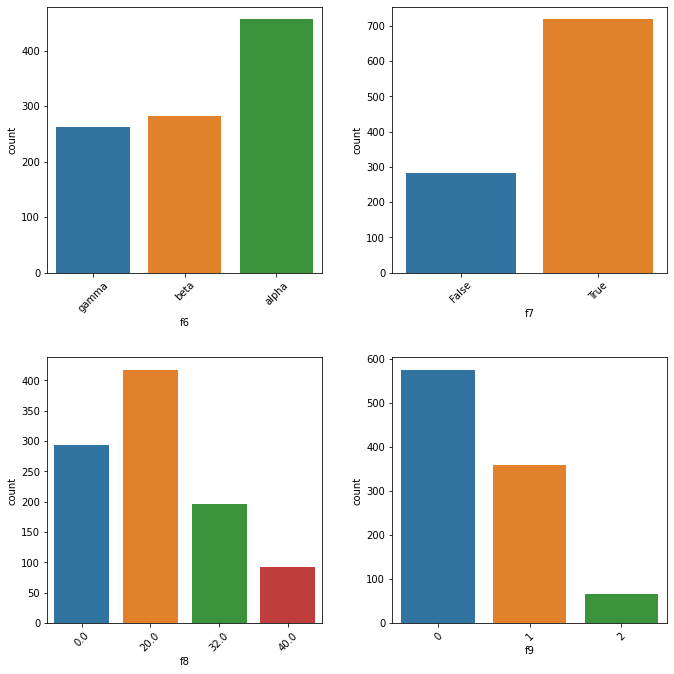

In [416]:
# plotting categorical data
c=1
plt.figure(figsize=(10,10))
for i in cat_cols:
    plt.subplot(2,2,c)
    sns.countplot(x=df[i])
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)
    c = c+1
plt.show()


### Displot

<Figure size 720x576 with 0 Axes>

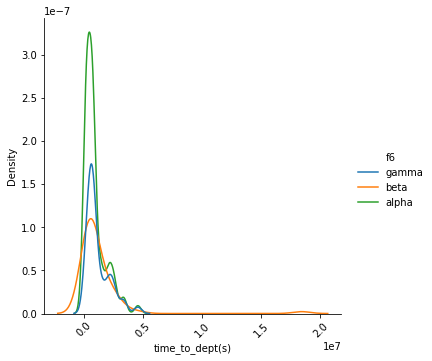

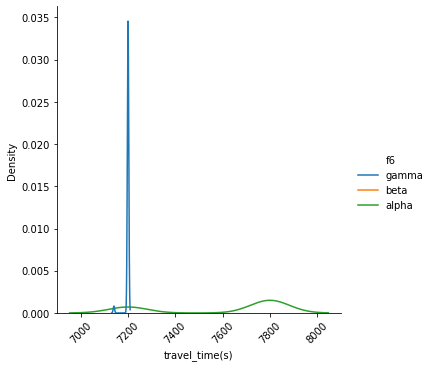

In [417]:
# plotting numerical data
c=1
plt.figure(figsize=(10,8))
for i in num_cols:
    sns.displot(df,
        x=df[i],
        hue="f6",
        kind="kde",
        warn_singular=False)
    plt.xticks(rotation=45)
plt.show()


### Boxplot

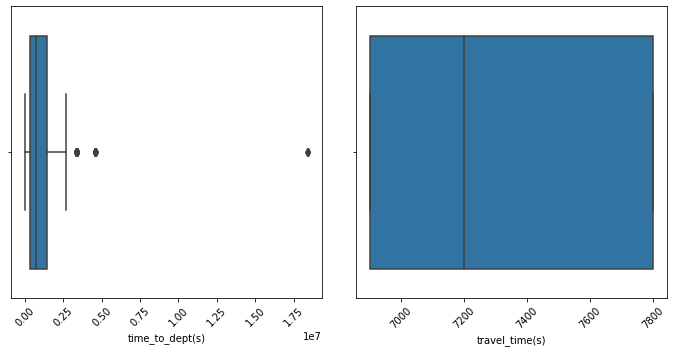

In [418]:
c=1
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(2,2,c)
    sns.boxplot(x=df[i])
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)
    c = c+1
plt.show()

### Displot of Target (Price)

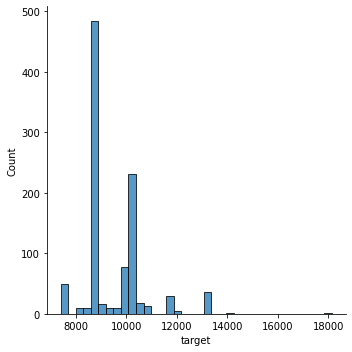

In [419]:
# target
sns.displot(df["target"])

### Boxplot of Target (Price)

<AxesSubplot:xlabel='target'>

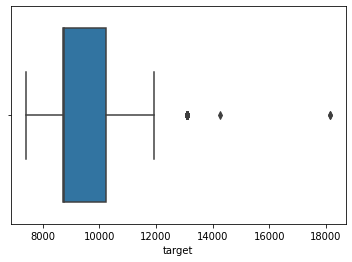

In [420]:
sns.boxplot(x=df["target"])

## **7. Feature Engineering - II**

### Outlier removal

In [421]:
df_clean = df[df['target']<15000]
df_clean = df_clean[df_clean["time_to_dept(s)"] < 3100000]
df_clean.head()

,time_to_dept(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,f10,target
0,846822.0,7200.0,2020-12-31 09:46:17.463002+00:00,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,0.0,0,c-2,7400.0
1,846822.0,7200.0,2020-12-31 09:46:17.463002+00:00,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,32.0,1,c-2,8650.0
2,868422.0,7200.0,2020-12-31 09:46:17.463002+00:00,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,1,c-4,9150.0
3,868422.0,7200.0,2020-12-31 09:46:17.463002+00:00,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,2,c-4,10400.0
4,2164421.0,6900.0,2020-12-31 09:46:18.191119+00:00,2021-01-25 11:00:00+00:00,2021-01-25 12:55:00+00:00,beta,False,20.0,0,b-69,8697.0


<AxesSubplot:xlabel='target'>

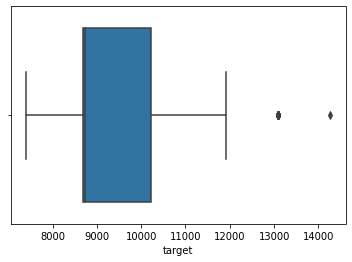

In [422]:
sns.boxplot(x=df_clean["target"])

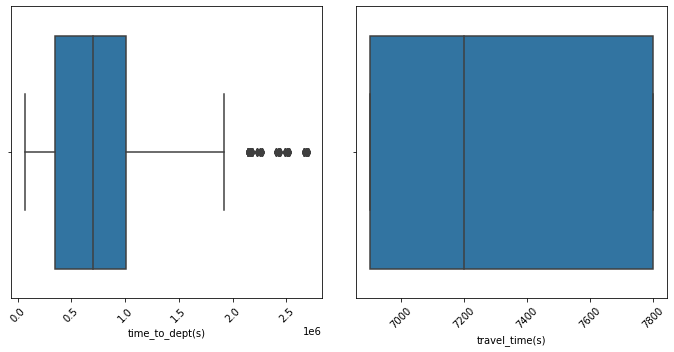

In [423]:
c=1
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(2,2,c)
    sns.boxplot(x=df_clean[i])
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)
    c = c+1
plt.show()

### Skewness/ Horizontal shift of the data

In [424]:
df_clean.skew()

time_to_dept(s)    1.164796
travel_time(s)     0.442644
f7                -0.986669
f8                -0.167167
f9                 0.862271
target             1.042499
dtype: float64

### Kurtosis/ Vertical shift of the data

In [425]:
df_clean.kurtosis()

time_to_dept(s)    0.345095
travel_time(s)    -1.338832
f7                -1.028663
f8                -1.105249
f9                -0.284316
target             1.821786
dtype: float64

### Dropping unwanted columns

In [426]:
df_clean.drop(['f1','f4','f5'], axis=1, inplace=True)
SastaX_test.drop(['f1','f4','f5'], axis=1, inplace=True)
df.head()

,time_to_dept(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,f10,target
0,846822.0,7200.0,2020-12-31 09:46:17.463002+00:00,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,0.0,0,c-2,7400.0
1,846822.0,7200.0,2020-12-31 09:46:17.463002+00:00,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,32.0,1,c-2,8650.0
2,868422.0,7200.0,2020-12-31 09:46:17.463002+00:00,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,1,c-4,9150.0
3,868422.0,7200.0,2020-12-31 09:46:17.463002+00:00,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,2,c-4,10400.0
4,2164421.0,6900.0,2020-12-31 09:46:18.191119+00:00,2021-01-25 11:00:00+00:00,2021-01-25 12:55:00+00:00,beta,False,20.0,0,b-69,8697.0


In [371]:
SastaX_test.head()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9,f10
0,613780.0,6900.0,beta,True,40.0,0,b-69
1,624580.0,6900.0,beta,True,40.0,0,b-9
2,592180.0,6900.0,beta,True,20.0,0,b-1
3,593979.0,7200.0,gamma,True,20.0,2,c-2
4,593979.0,7200.0,gamma,True,20.0,1,c-2


## **8. Feature Encoding**

### Label Encoding

In [427]:
# encoding of categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_clean["f6"] = le.fit_transform(df_clean["f6"])
df_clean["f7"] = le.fit_transform(df_clean["f7"])
df_clean["f8"] = le.fit_transform(df_clean["f8"])
df_clean["f10"] = le.fit_transform(df_clean["f10"])

SastaX_test["f6"] = le.fit_transform(SastaX_test["f6"])
SastaX_test["f7"] = le.fit_transform(SastaX_test["f7"])
SastaX_test["f8"] = le.fit_transform(SastaX_test["f8"])
SastaX_test["f10"] = le.fit_transform(SastaX_test["f10"])

df_clean.head()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9,f10,target
0,846822.0,7200.0,2,1,0,0,7,7400.0
1,846822.0,7200.0,2,1,2,1,7,8650.0
2,868422.0,7200.0,2,1,2,1,8,9150.0
3,868422.0,7200.0,2,1,2,2,8,10400.0
4,2164421.0,6900.0,1,0,1,0,5,8697.0


In [428]:
SastaX_test.head()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9,f10
0,613780.0,6900.0,1,0,2,0,8
1,624580.0,6900.0,1,0,2,0,10
2,592180.0,6900.0,1,0,1,0,5
3,593979.0,7200.0,2,0,1,2,11
4,593979.0,7200.0,2,0,1,1,11


In [374]:
df.describe()

,time_to_dept(s),travel_time(s),f8,f9,target
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.086357e+06,7301.040000,18.364000,0.491000,9441.422000
std,1.440616e+06,356.257544,13.426533,0.618305,1238.600867
min,4.093000e+03,6900.000000,0.000000,0.000000,7400.000000
25%,3.497520e+05,6900.000000,0.000000,0.000000,8697.000000
50%,7.059660e+05,7200.000000,20.000000,0.000000,8739.000000
75%,1.451098e+06,7800.000000,32.000000,1.000000,10227.000000
max,1.842878e+07,7800.000000,40.000000,2.000000,18156.000000


## **9. Feature Scaling**

### MinMax

In [429]:
from sklearn.preprocessing import MinMaxScaler

# MinMax Scalar based on 0 - 1 range
df_name = df_clean.columns
trans = MinMaxScaler()
data = trans.fit_transform(df_clean.values)
df_scaled = pd.DataFrame(data, columns = df_name)

SastaX_test_names = SastaX_test.columns
Sastaticket_test_data = trans.fit_transform(SastaX_test.values)
SastaX_test_scaled = pd.DataFrame(Sastaticket_test_data, columns = SastaX_test_names)


df_scaled

,time_to_dept(s),travel_time(s),f6,f7,f8,f9,f10,target
0,0.295842,0.333333,1.0,1.0,0.000000,0.0,0.875,0.000000
1,0.295842,0.333333,1.0,1.0,0.666667,0.5,0.875,0.182030
2,0.304046,0.333333,1.0,1.0,0.666667,0.5,1.000,0.254842
3,0.304046,0.333333,1.0,1.0,0.666667,1.0,1.000,0.436872
4,0.796295,0.000000,0.5,0.0,0.333333,0.0,0.625,0.188874
...,...,...,...,...,...,...,...,...
941,0.262759,1.000000,0.0,1.0,0.000000,0.0,0.000,0.194991
942,0.273356,0.333333,0.0,1.0,0.333333,0.5,0.125,0.411679
943,0.375904,0.000000,0.5,0.0,0.333333,0.0,0.500,0.188874
944,0.373169,0.000000,0.5,0.0,0.333333,0.0,0.750,0.188874


In [430]:
SastaX_test_scaled.head()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9,f10
0,0.048855,0.0,0.333333,0.0,1.0,0.0,0.5000
1,0.049721,0.0,0.333333,0.0,1.0,0.0,0.6250
2,0.047122,0.0,0.333333,0.0,0.5,0.0,0.3125
3,0.047266,1.0,0.666667,0.0,0.5,1.0,0.6875
4,0.047266,1.0,0.666667,0.0,0.5,0.5,0.6875


## **10. Feature Selection**

### Feature Importance

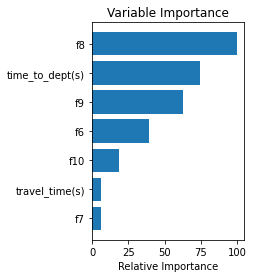

In [431]:
from sklearn.ensemble import ExtraTreesRegressor

df_name = df_scaled.columns
clf = ExtraTreesRegressor(n_estimators=250,
                              random_state=SEED)

clf.fit(df_scaled[df_name[0:7]],df_scaled[df_name[7]])


# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_scaled.columns[sorted_idx])
#boston.feature_names[sorted_idx])

plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [432]:
df_feature_imp = df_scaled[['time_to_dept(s)', 'f6','f8','f9','f10', 'target']]
df_feature_imp_name = df_feature_imp.columns

### Correlation among Important Features

In [433]:
df_feature_imp.corr()

,time_to_dept(s),f6,f8,f9,f10,target
time_to_dept(s),1.000000,0.113050,-0.025347,0.030975,0.109760,-0.125512
f6,0.113050,1.000000,0.519944,0.271341,0.951293,-0.280519
f8,-0.025347,0.519944,1.000000,0.414957,0.545940,0.480466
f9,0.030975,0.271341,0.414957,1.000000,0.267697,0.380694
f10,0.109760,0.951293,0.545940,0.267697,1.000000,-0.212673
target,-0.125512,-0.280519,0.480466,0.380694,-0.212673,1.000000


<AxesSubplot:>

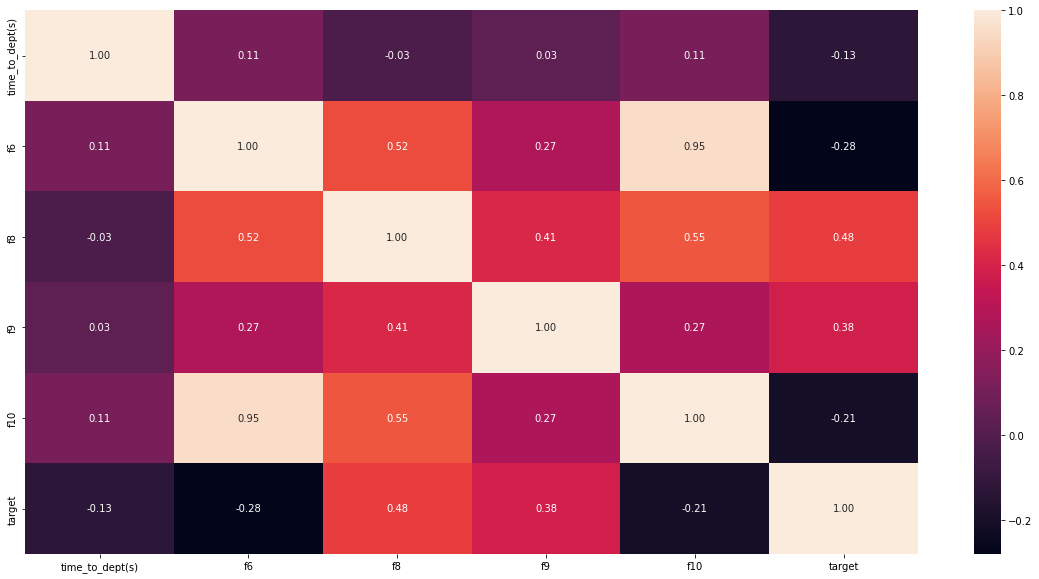

In [434]:
plt.figure(figsize=(20,10))
sns.heatmap(df_feature_imp.corr(), annot=True, fmt='.2f')

## **11. Model Selection**

### Importing Models

In [436]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
# For Classification
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB



from pandas import set_option
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# For Classification
# from pandas.tools.plotting import scatter_matrix
# from sklearn.model_selection import StratifiedKFold


from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,max_error,r2_score,median_absolute_error,mean_squared_log_error

### Models Function

In [437]:
# Initial Algorithms to fit the data on
def GetBasedModel():
    basedModels = []
    basedModels.append(('Linear Regression', LinearRegression()))
    basedModels.append(('K-Nearest Neigbour', KNeighborsRegressor()))
    basedModels.append(('Decision Tree', DecisionTreeRegressor()))
    basedModels.append(('Support Vector Machine', SVR()))
    basedModels.append(('Ada Boost', AdaBoostRegressor()))
    basedModels.append(('Gradient Boost'  , GradientBoostingRegressor()))
    basedModels.append(('Random Forest'   , RandomForestRegressor()))
    basedModels.append(('Extra Tree Classifier'   , ExtraTreesRegressor()))
    basedModels.append(('XG Boost', xgb.XGBRegressor()))
    # max_depth = 12, eta = 0.3,n_estimators = 100, objective = 'reg:squarederror',gamma = 0.01

    
    return basedModels

### Metrics Function

In [569]:
def evaluate_metrics(X_test,y_test,y_pred,model):
    mean_abs_error = mean_absolute_error(y_test,y_pred)
    mean_sq_error = mean_squared_error(y_test,y_pred)
    root_mean_sq_error = mean_squared_error(y_test,y_pred)**0.5
    r2_scr = r2_score(y_test,y_pred)
    median_abs_score = median_absolute_error(y_test,y_pred)
    explained_variance = explained_variance_score(y_test,y_pred)
    max_err = max_error(y_test,y_pred)

    metric_name = ["Mean Absolute Error (MAE)","Mean Square Error (MSE)","Root Mean Squared Error (RMSE)","R2 Score","Median Absolute Error","Explained Variance Score", "Max Error"]

    return metric_name, mean_abs_error, mean_sq_error, root_mean_sq_error, r2_scr, median_abs_score, explained_variance, max_err

### Model Tuning Function

In [571]:
def BasedLine2(X_train, y_train, X_test, y_test, models):

    results = []
    names = []
    metric_values = []
    metric_names = []

    for name, model in models:
        kfold = KFold(n_splits=10, random_state=SEED, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
        # For scoring Parameters visit: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        results.append(abs(cv_results))
        names.append(name)
        # print(f"{name} {abs(cv_results.mean()):.3f} [{cv_results.std():.3f}]")
        # print(abs(cv_results))
        
        model.fit(X_train, y_train)
        global y_pred
        y_pred = model.predict(X_test)
        m_n, mean_abs_error, mean_sq_error, root_mean_sq_error, r2_scr, median_abs_score, explained_variance, max_err = evaluate_metrics(X_test, y_test, y_pred, models)

        metric_names.append(m_n)
        metric_values.append((mean_abs_error.mean(), mean_sq_error.mean(), root_mean_sq_error.mean(), r2_scr.mean(), median_abs_score.mean(), explained_variance.mean(), max_err.mean()))
        
    return names, results, metric_names, metric_values

### Models Visualization Function

In [460]:
class PlotBoxR(object):
    
    def __Trace(self,nameOfFeature,value): 

        trace = go.Box(
            y = value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):

        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))

        py.iplot(data)

### Splitting data into Train and Test

In [441]:
train, test = train_test_split(df_feature_imp, test_size=0.25, random_state=0)

X_train, y_train = train[['time_to_dept(s)', 'f6', 'f8', 'f9', 'f10']].values, train['target'].values
X_test, y_test = test[['time_to_dept(s)', 'f6', 'f8', 'f9', 'f10']].values, test['target'].values

### Model Training and Evaluation

In [570]:
import warnings
warnings.filterwarnings("ignore")

models = GetBasedModel()
names, results, metric_names, metric_values = BasedLine2(X_train, y_train, X_test, y_test, models)
PlotBoxR().PlotResult(names, results)
pd.DataFrame(metric_values, columns=metric_names[0], index=names)


,Mean Absolute Error (MAE),Mean Square Error (MSE),Root Mean Squared Error (RMSE),R2 Score,Median Absolute Error,Explained Variance Score,Max Error
Linear Regression,0.056532,0.009007,0.094906,0.654392,2.950772e-02,0.655477,0.399929
K-Nearest Neigbour,0.012039,0.001266,0.035580,0.951425,0.000000e+00,0.951428,0.176059
Decision Tree,0.003470,0.000586,0.024209,0.977511,2.775558e-17,0.977973,0.216834
Support Vector Machine,0.068478,0.006648,0.081533,0.744927,7.413282e-02,0.768177,0.347965
Ada Boost,0.060708,0.004625,0.068008,0.822532,5.417213e-02,0.889741,0.142347
Gradient Boost,0.010746,0.000368,0.019185,0.985877,4.392265e-03,0.985945,0.103988
Random Forest,0.005703,0.000354,0.018815,0.986416,1.110223e-16,0.986858,0.140942
Extra Tree Classifier,0.002276,0.000255,0.015958,0.990229,4.440892e-16,0.990420,0.168676
XG Boost,0.002724,0.000283,0.016832,0.989129,1.966433e-04,0.989302,0.199009


## **12. Saving Results** (of provided Test data) 
Choosing ExtraTreesRegressor since it performed the best 

In [579]:
SastaX_tests = SastaX_test[['time_to_dept(s)', 'f6', 'f8', 'f9', 'f10']]
ext = ExtraTreesRegressor().fit(X_train, y_train)
pred = ext.predict(SastaX_tests)


res = pd.DataFrame(pred)
res.index = SastaX_tests.index
res.columns = ["prediction"]
res.to_csv("accurate_sastaticket_pred.csv")
res


,prediction
0,0.714069
1,0.714069
2,0.714069
3,0.662018
4,0.662018
...,...
995,0.714069
996,0.714069
997,0.714069
998,0.714069
